Missing values in customers dataset:
CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64

Missing values in products dataset:
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64

Missing values in transactions dataset:
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


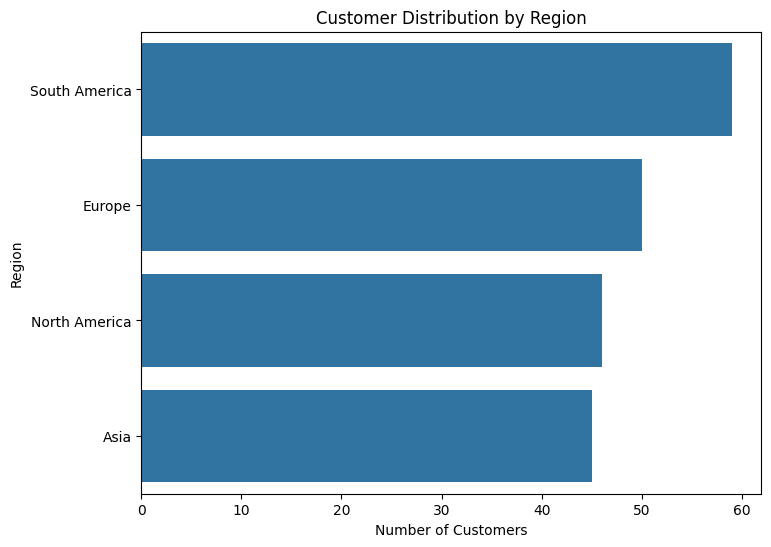

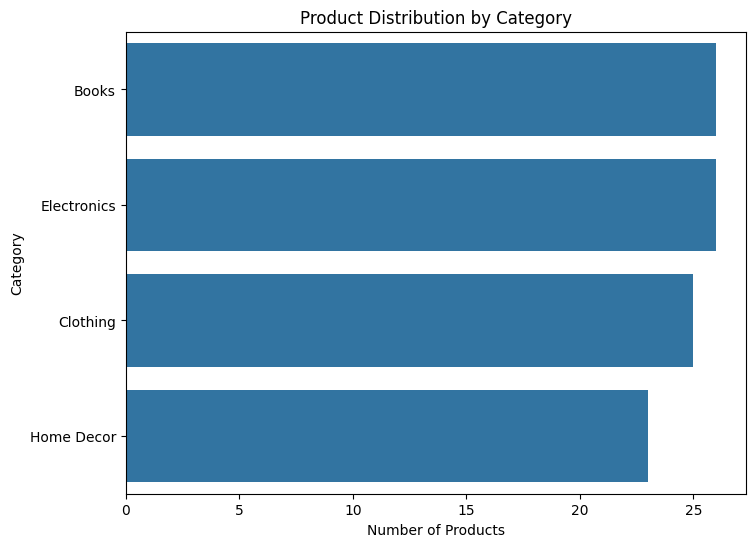

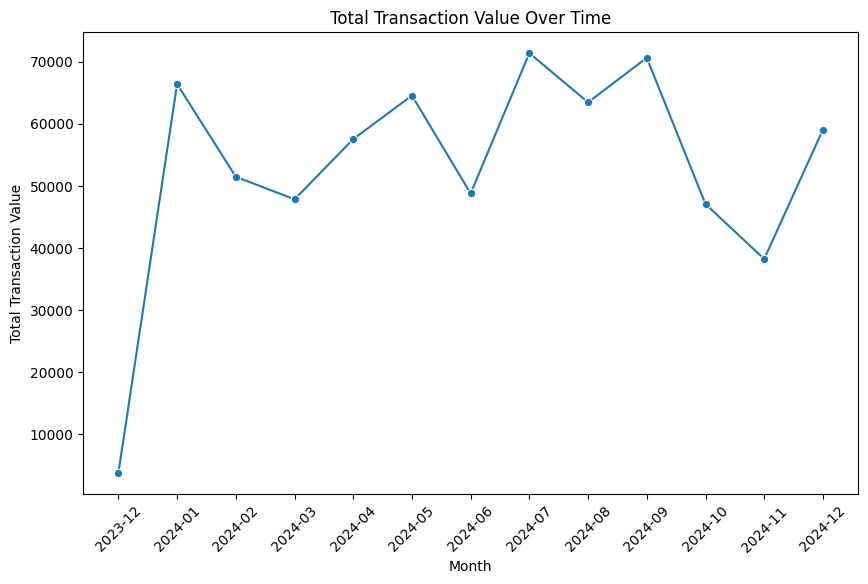

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

customers_df = pd.read_csv('Customers.csv')
products_df = pd.read_csv('Products.csv')
transactions_df = pd.read_csv('Transactions.csv')

print("Missing values in customers dataset:")
print(customers_df.isnull().sum())
print("\nMissing values in products dataset:")
print(products_df.isnull().sum())
print("\nMissing values in transactions dataset:")
print(transactions_df.isnull().sum())

plt.figure(figsize=(8, 6))
sns.countplot(y='Region', data=customers_df, order=customers_df['Region'].value_counts().index)
plt.title('Customer Distribution by Region')
plt.xlabel('Number of Customers')
plt.ylabel('Region')
plt.show()

plt.figure(figsize=(8, 6))
sns.countplot(y='Category', data=products_df, order=products_df['Category'].value_counts().index)
plt.title('Product Distribution by Category')
plt.xlabel('Number of Products')
plt.ylabel('Category')
plt.show()

transactions_df['TransactionDate'] = pd.to_datetime(transactions_df['TransactionDate'])
transactions_df['TransactionMonth'] = transactions_df['TransactionDate'].dt.to_period('M')

monthly_sales = transactions_df.groupby('TransactionMonth')['TotalValue'].sum().reset_index()
monthly_sales['TransactionMonth'] = monthly_sales['TransactionMonth'].astype(str)

plt.figure(figsize=(10, 6))
sns.lineplot(x='TransactionMonth', y='TotalValue', data=monthly_sales, marker='o')
plt.title('Total Transaction Value Over Time')
plt.xlabel('Month')
plt.ylabel('Total Transaction Value')
plt.xticks(rotation=45)
plt.show()


In [6]:
from sklearn.metrics.pairwise import cosine_similarity

customer_transactions = pd.merge(transactions_df, customers_df, on='CustomerID')

customer_profiles = customer_transactions.pivot_table(index='CustomerID', columns='ProductID', values='Quantity', aggfunc='sum', fill_value=0)

similarity_matrix = pd.DataFrame(cosine_similarity(customer_profiles), index=customer_profiles.index, columns=customer_profiles.index)

top_lookalikes = {}
for customer_id in customers_df['CustomerID'][:20]:
    similar_customers = similarity_matrix[customer_id].sort_values(ascending=False).index[1:4]
    top_lookalikes[customer_id] = [(other_id, similarity_matrix.at[customer_id, other_id]) for other_id in similar_customers]

lookalikes_df = pd.DataFrame.from_dict(top_lookalikes, orient='index', columns=['Lookalike_1', 'Lookalike_2', 'Lookalike_3'])
lookalikes_df.to_csv('Lookalike.csv', index_label='CustomerID')

print("Top lookalikes for first 20 customers saved to 'Lookalike.csv'")


Top lookalikes for first 20 customers saved to 'Lookalike.csv'


In [7]:
pd.read_csv('Lookalike.csv')

,CustomerID,Lookalike_1,Lookalike_2,Lookalike_3
0,C0001,"('C0097', 0.5477225575051661)","('C0194', 0.469668218313862)","('C0199', 0.4381780460041329)"
1,C0002,"('C0030', 0.37282185960072)","('C0091', 0.3339135484518728)","('C0071', 0.329914439536929)"
2,C0003,"('C0134', 0.5199469468957452)","('C0181', 0.5175973113765044)","('C0144', 0.39999999999999997)"
3,C0004,"('C0070', 0.4988876515698588)","('C0132', 0.4381780460041328)","('C0063', 0.3360672201667223)"
4,C0005,"('C0096', 0.6482037235521645)","('C0055', 0.5144957554275265)","('C0064', 0.3328770246548891)"
5,C0006,"('C0058', 0.6488856845230502)","('C0040', 0.629511580291707)","('C0178', 0.3746343246326776)"
6,C0007,"('C0020', 0.5883484054145521)","('C0079', 0.49613893835683387)","('C0026', 0.36313651960128146)"
7,C0008,"('C0144', 0.39223227027636803)","('C0088', 0.33968311024337877)","('C0003', 0.31378581622109447)"
8,C0009,"('C0140', 0.560112033611204)","('C0162', 0.5132649025747366)","('C0062', 0.49507377148833714)"
9,C0010,"('C0033', 0.48666426339228763)","('C0077', 0.42479539524287324)","('C0094', 0.40590605489504306)"


Davies-Bouldin Index: 0.739


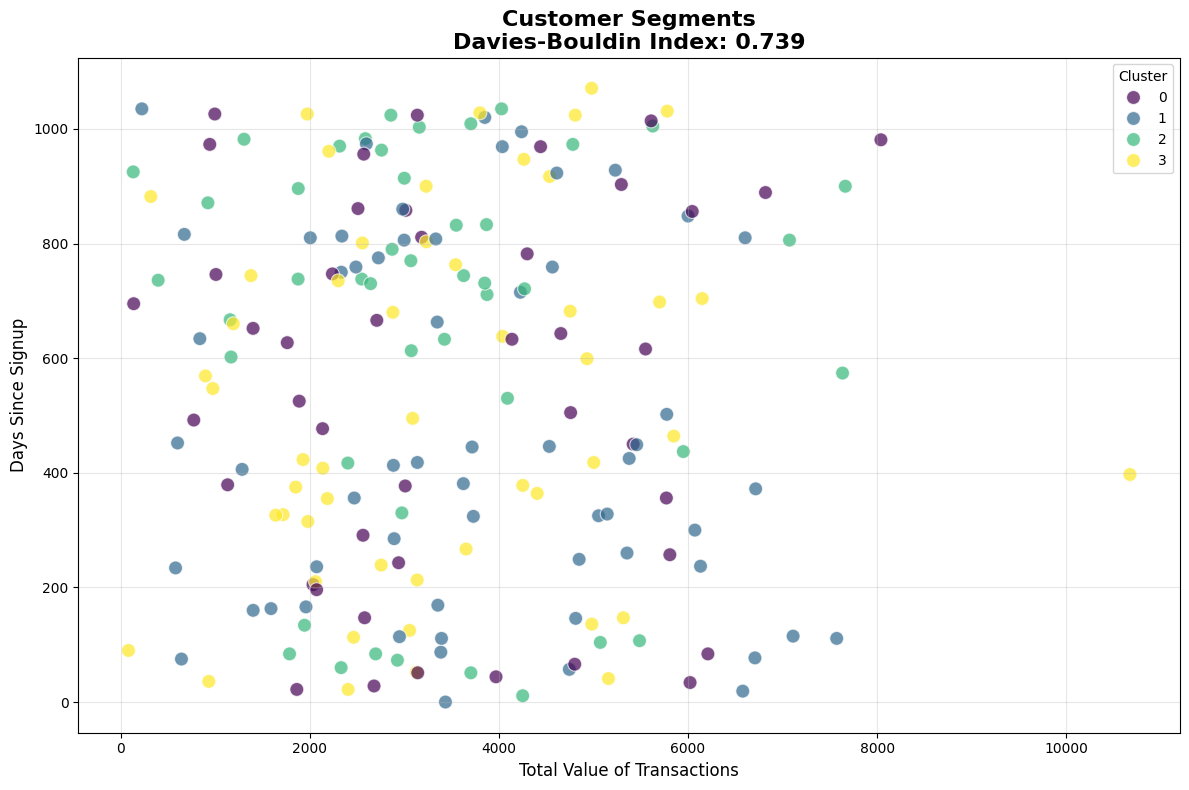

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

customer_data = pd.merge(customers_df, transactions_df.groupby('CustomerID')['TotalValue'].sum().reset_index(), on='CustomerID')

customer_data_encoded = pd.get_dummies(customer_data, columns=['Region'], drop_first=True)

scaler = StandardScaler()
customer_data_scaled = scaler.fit_transform(customer_data_encoded.drop(['CustomerID', 'CustomerName', 'SignupDate'], axis=1))

kmeans = KMeans(n_clusters=4, random_state=42)
customer_data['Cluster'] = kmeans.fit_predict(customer_data_scaled)

db_index = davies_bouldin_score(customer_data_scaled, customer_data['Cluster'])
print(f"Davies-Bouldin Index: {db_index:.3f}")

customer_data['SignupDate'] = pd.to_datetime(customer_data['SignupDate'])
customer_data['DaysSinceSignup'] = (customer_data['SignupDate'] - customer_data['SignupDate'].min()).dt.days

plt.figure(figsize=(12, 8))
sns.scatterplot(
    x='TotalValue',
    y='DaysSinceSignup',
    hue='Cluster',
    data=customer_data,
    palette='viridis',
    s=100,
    alpha=0.7
)

plt.title(f"Customer Segments\nDavies-Bouldin Index: {db_index:.3f}", fontsize=16, fontweight='bold')
plt.xlabel('Total Value of Transactions', fontsize=12)
plt.ylabel('Days Since Signup', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title='Cluster', fontsize=10)
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

,CustomerID,Lookalike_1,Lookalike_2,Lookalike_3
0,C0001,"('C0097', 0.5477225575051661)","('C0194', 0.469668218313862)","('C0199', 0.4381780460041329)"
1,C0002,"('C0030', 0.37282185960072)","('C0091', 0.3339135484518728)","('C0071', 0.329914439536929)"
2,C0003,"('C0134', 0.5199469468957452)","('C0181', 0.5175973113765044)","('C0144', 0.39999999999999997)"
3,C0004,"('C0070', 0.4988876515698588)","('C0132', 0.4381780460041328)","('C0063', 0.3360672201667223)"
4,C0005,"('C0096', 0.6482037235521645)","('C0055', 0.5144957554275265)","('C0064', 0.3328770246548891)"
5,C0006,"('C0058', 0.6488856845230502)","('C0040', 0.629511580291707)","('C0178', 0.3746343246326776)"
6,C0007,"('C0020', 0.5883484054145521)","('C0079', 0.49613893835683387)","('C0026', 0.36313651960128146)"
7,C0008,"('C0144', 0.39223227027636803)","('C0088', 0.33968311024337877)","('C0003', 0.31378581622109447)"
8,C0009,"('C0140', 0.560112033611204)","('C0162', 0.5132649025747366)","('C0062', 0.49507377148833714)"
9,C0010,"('C0033', 0.48666426339228763)","('C0077', 0.42479539524287324)","('C0094', 0.40590605489504306)"


In [5]:
from google.colab import files

# Download the file
files.download('Lookalike.csv')
